# Data Visualization Challenge
# _________________________________________________________________________________________________________________________________
## Analysis

In [3]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 100% !important}</style>'))

# data files from the scientific study
mouse_metadata_path = '/Users/sophiasaavedra/Desktop/ucb ext data analytics/data visualization homework/data-visualization-challenge/Resources/Mouse_metadata.csv'
study_results_path = '/Users/sophiasaavedra/Desktop/ucb ext data analytics/data visualization homework/data-visualization-challenge/Resources/Study_results.csv'

# reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# merging the data into a single dataset 
study_data_complete = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])

# display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# counting the number of mice
len(study_data_complete['Mouse ID'].unique())

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#study_data_complete['Timepoint'].duplicated()

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 

In [141]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#study_data_complete[study_data_complete['Mouse ID'] == 'g989']
study_data_clean = study_data_complete.drop(index = [908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], axis = 0)
study_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [142]:
# Checking the number of mice in the clean DataFrame.
len(study_data_clean['Mouse ID'].unique())

248

## Summary Statistics

In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_vol = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_vol = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_vol = study_data_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df1 = pd.DataFrame({"Mean Tumor Volume":mean_tumor_vol, "Median Tumor Volume":median_tumor_vol, "Tumor Volume Variance":var_tumor_vol, "Tumor Volume Std. Dev.":std_tumor_vol, "Tumor Volume Std Err.":sem_tumor_vol})
summary_df1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# simplifying: using the aggregation method to produce the same summary statistics in a single line
summary_df2 =  study_data_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar & Pie Chart

In [21]:
#getting the value counts of mice for each drug regimen
mice_count = study_data_clean["Drug Regimen"].value_counts()

Text(0.5, 0, 'Number of Mice Tested')

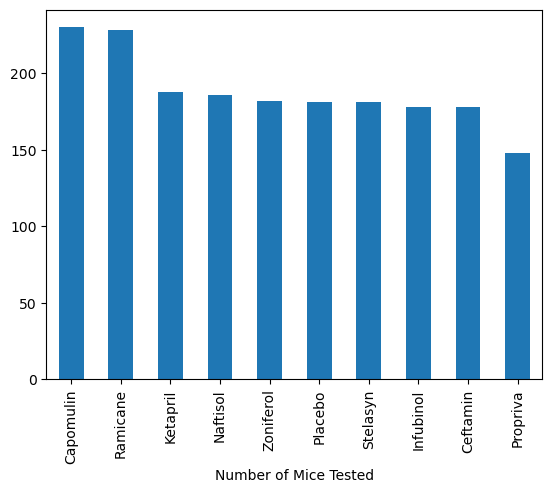

In [23]:
# generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
plot_pandas = mice_count.plot.bar()

#labeling axes
plt.xlabel("Drug Regimen")
plt.xlabel("Number of Mice Tested")

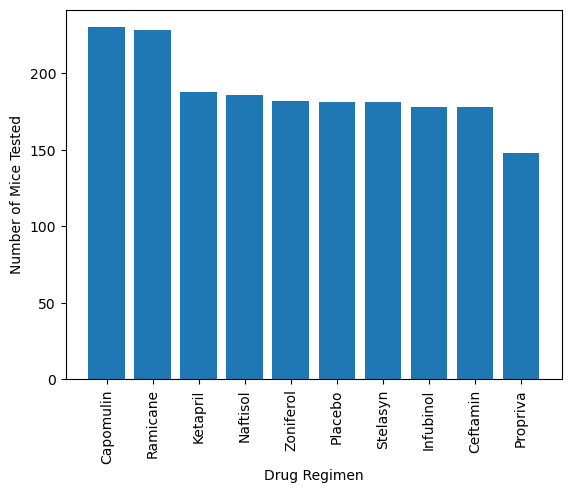

In [144]:
# generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
plt.bar(mice_count.index.values, mice_count.values)

#labeling axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

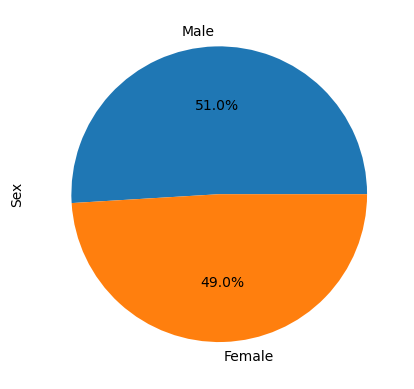

In [133]:
# generating a pie plot showing the distribution of female versus male mice using Pandas
sex_df = study_data_clean["Sex"].value_counts()
sex_df.plot.pie(autopct= "%1.1f%%")
plt.show()

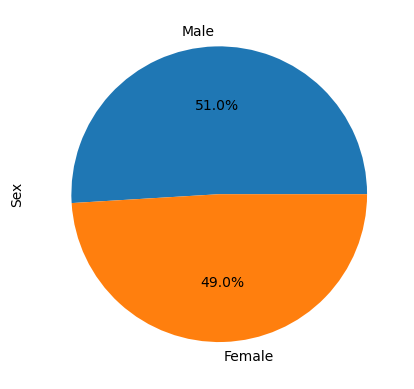

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf = ["Male", "Female"]
plt.pie(sex_df, labels = mf, autopct= "%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#filtering study_data_clean for Drug Regimen == Capomulin
Capomulin_df = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Capomulin",:]
#groupby Mouse ID & final timepoint
Capomulin_final_time = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
#finding the associated final tumor volume
Capomulin_final_vol = pd.DataFrame(Capomulin_final_time)
#merging with study_data_clean dataframe
Capomulin_df2 = pd.merge(Capomulin_final_vol, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
Capomulin_df2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [146]:
#calculating quartiles
quartiles = Capomulin_df2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

#printing results
print(f"Lower quartile of final tumor volume with Capomulin treatment: {lower_quartile}")
print(f"Upper quartile of final tumor volume with Capomulin treatment: {upper_quartile}")
print(f"Interquartile range of final tumor volume with Capomulin treatment: {iqr}")
print(f"Median of final tumor volume with Capomulin treatment: {quartiles[0.5]} ")
print(f"Values below the lower bound, {lower_bound}, are outliers.")
print(f"Values above the upper bound, {upper_bound}, are outliers.")

Lower quartile of final tumor volume with Capomulin treatment: 32.37735684
Upper quartile of final tumor volume with Capomulin treatment: 40.1592203
Interquartile range of final tumor volume with Capomulin treatment: 7.781863460000004
Median of final tumor volume with Capomulin treatment: 38.1251644 
Values below the lower bound, 20.70456164999999, are outliers.
Values above the upper bound, 51.83201549, are outliers.


In [96]:
# treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# for drug in treatments:
#     drug_df = study_data_clean.loc[study_data_clean["Drug Regimen"] == drug,:]
#     drug_final_time = drug_df.groupby('Mouse ID').max()['Timepoint']
#     drug_final_vol = pd.DataFrame(drug_final_time)
#     drug_df2 = pd.merge(drug_final_vol, study_data_clean, on=("Mouse ID","Timepoint"),how="left")

In [137]:
Ramicane_df = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Ramicane", :]
Ramicane_final_time = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_final_vol = pd.DataFrame(Ramicane_final_time)
Ramicane_df2 = pd.merge(Ramicane_final_vol, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
Ramicane_df2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [102]:
quartiles = Ramicane_df2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"Lower quartile of final tumor volume with Ramicane treatment: {lower_quartile}")
print(f"Upper quartile of final tumor volume with Ramicane treatment: {upper_quartile}")
print(f"Interquartile range of final tumor volume with Ramicane treatment: {iqr}")
print(f"Median of final tumor volume with Ramicane treatment: {quartiles[0.5]} ")
print(f"Values below the lower bound, {lower_bound}, are outliers.")
print(f"Values above the upper bound, {upper_bound}, are outliers.")

Lower quartile of final tumor volume with Ramicane treatment: 31.56046955
Upper quartile of final tumor volume with Ramicane treatment: 40.65900627
Interquartile range of final tumor volume with Ramicane treatment: 9.098536719999998
Median of final tumor volume with Ramicane treatment: 36.56165229 
Values below the lower bound, 17.912664470000003, are outliers.
Values above the upper bound, 54.30681135, are outliers.


In [103]:
Infubinol_df = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Infubinol", :]
Infubinol_final_time = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_final_vol = pd.DataFrame(Infubinol_final_time)
Infubinol_df2 = pd.merge(Infubinol_final_vol, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
Infubinol_df2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [104]:
quartiles = Infubinol_df2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"Lower quartile of final tumor volume with Infubinol treatment: {lower_quartile}")
print(f"Upper quartile of final tumor volume with Infubinol treatment: {upper_quartile}")
print(f"Interquartile range of final tumor volume with Infubinol treatment: {iqr}")
print(f"Median of final tumor volume with Infubinol treatment: {quartiles[0.5]} ")
print(f"Values below the lower bound, {lower_bound}, are outliers.")
print(f"Values above the upper bound, {upper_bound}, are outliers.")

Lower quartile of final tumor volume with Infubinol treatment: 54.04860769
Upper quartile of final tumor volume with Infubinol treatment: 65.52574285
Interquartile range of final tumor volume with Infubinol treatment: 11.477135160000003
Median of final tumor volume with Infubinol treatment: 60.16518046 
Values below the lower bound, 36.83290494999999, are outliers.
Values above the upper bound, 82.74144559000001, are outliers.


In [60]:
Ceftamin_df = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Ceftamin", :]
Ceftamin_final_time = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_final_vol = pd.DataFrame(Ceftamin_final_time)
Ceftamin_df2 = pd.merge(Ceftamin_final_vol, study_data_clean, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_df2.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [100]:
quartiles = Ceftamin_df2["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
lower_bound = lower_quartile - (1.5*iqr)
upper_bound = upper_quartile + (1.5*iqr)

print(f"Lower quartile of final tumor volume with Ceftamin treatment: {lower_quartile}")
print(f"Upper quartile of final tumor volume with Ceftamin treatment: {upper_quartile}")
print(f"Interquartile range of final tumor volume with Ceftamin treatment: {iqr}")
print(f"Median of final tumor volume with Ceftamin treatment: {quartiles[0.5]} ")
print(f"Values below the lower bound, {lower_bound}, are outliers.")
print(f"Values above the upper bound, {upper_bound}, are outliers.")

Lower quartile of final tumor volume with Ceftamin treatment: 48.72207785
Upper quartile of final tumor volume with Ceftamin treatment: 64.29983003
Interquartile range of final tumor volume with Ceftamin treatment: 15.577752179999997
Median of final tumor volume with Ceftamin treatment: 59.85195552 
Values below the lower bound, 25.355449580000002, are outliers.
Values above the upper bound, 87.66645829999999, are outliers.


In [147]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.   
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset 
    # Determine outliers using upper and lower bounds
tumor_volume_data = []
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [140]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
